In [1]:
symbol = input("Enter the symbol : ")

In [2]:
from nse import *
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import gym
from RLenv import CustomTradingEnv

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [3]:
df = pd.read_csv(f"{symbol}.csv")

In [9]:
today = datetime.now()
oneyearago = today - timedelta(days=365*5)

date_format = "%d-%m-%Y"
try:
    df = scrape_data(f"{oneyearago.strftime(date_format)}",f"{today.strftime(date_format)}",symbol)
    df.to_csv(f"{symbol}.csv")
except Exception as e:
    print(e)
    df = pd.read_csv(f"{symbol}.csv")
rawdata = df.copy()
df.head()


,Date,Symbol,Series,High Price,Low Price,Open Price,Close Price,Last Price,Prev Close Price,Total Traded Quantity,Total Traded Value,52 Week High Price,52 Week Low Price
0,2018-08-10,TCS,EQ,1996.50,1972.05,1980.95,1993.10,1992.0,1974.35,2784105,5.528317e+09,3674.8,1711.15
1,2018-08-13,TCS,EQ,2004.25,1990.00,1997.80,2000.15,1999.5,1993.10,3559575,7.112184e+09,3674.8,1711.15
2,2018-08-14,TCS,EQ,2024.60,1982.40,1992.00,2003.55,2000.0,2000.15,3311765,6.657771e+09,3674.8,1711.15
3,2018-08-16,TCS,EQ,2020.05,1995.00,2000.30,2008.50,2009.1,2003.55,2152065,4.322408e+09,3674.8,1711.15
4,2018-08-17,TCS,EQ,2021.90,2004.00,2013.85,2012.75,2010.0,2008.50,1213731,2.443059e+09,3674.8,1711.15


In [4]:
df = df[['Date','High Price', 'Low Price', 'Open Price','Close Price', 'Total Traded Quantity']]
df.columns = ['Date','high', 'low', 'open','close', 'volume']
df.head()

,Date,high,low,open,close,volume
0,2018-08-10,1996.50,1972.05,1980.95,1993.10,2784105
1,2018-08-13,2004.25,1990.00,1997.80,2000.15,3559575
2,2018-08-14,2024.60,1982.40,1992.00,2003.55,3311765
3,2018-08-16,2020.05,1995.00,2000.30,2008.50,2152065
4,2018-08-17,2021.90,2004.00,2013.85,2012.75,1213731


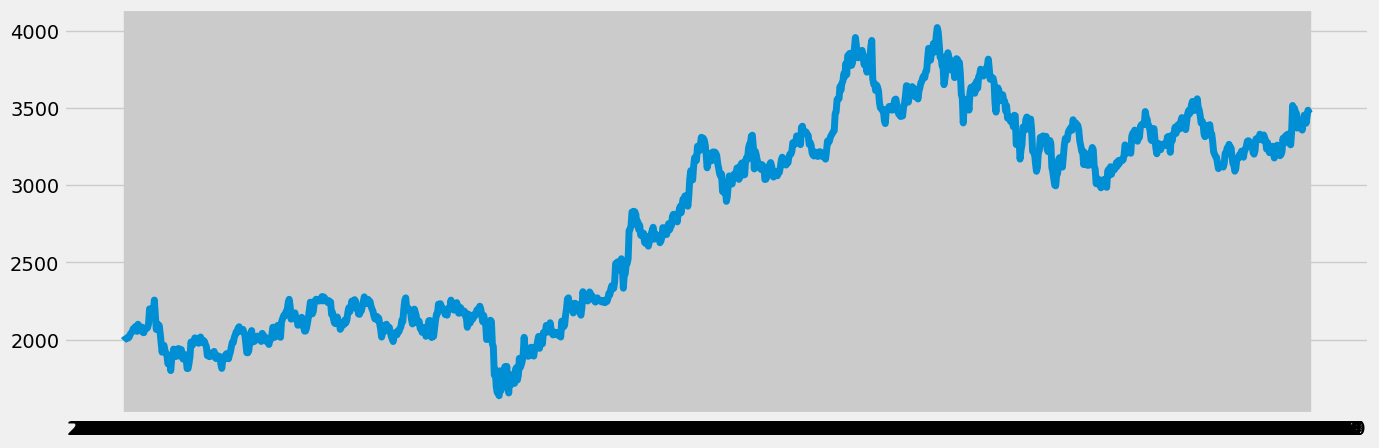

In [5]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(df['Date'],df['close'],label="Close", linestyle="-", linewidth=5)

In [6]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
# plt.savefig(name+'.png')
plt.show()

NameError: name 'close' is not defined

<Figure size 1500x500 with 0 Axes>

In [5]:
from gym.envs.registration import register
from copy import deepcopy

register(
    id='customstocks',
    entry_point='RLenv:CustomTradingEnv',
    kwargs={
        'df': deepcopy(df),
        'window_size': 30,
        'frame_bound': (30, len(df))
    }
)

In [6]:
del CustomTradingEnv

In [7]:

from RLenv import CustomTradingEnv
# df.columns = ['Date','High', 'Low', 'Open','Close', 'Volume']

env = gym.make('customstocks', df=df, frame_bound=(len(df["Date"]) - 200, len(df["Date"])), window_size=5, initial_money=100000)


e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 3)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "


In [8]:
env.signal_features

array([[ 3.10330000e+03,  0.00000000e+00,  0.00000000e+00],
       [ 3.09915000e+03, -4.15000000e+00, -3.31054131e-01],
       [ 3.11175000e+03,  1.26000000e+01,  4.18473876e-01],
       [ 3.14470000e+03,  3.29500000e+01,  3.62943201e+00],
       [ 3.12185000e+03, -2.28500000e+01,  4.28098689e+00],
       [ 3.15730000e+03,  3.54500000e+01,  7.57059840e+00],
       [ 3.13740000e+03, -1.99000000e+01,  8.47419035e+00],
       [ 3.16170000e+03,  2.43000000e+01,  1.10240223e+01],
       [ 3.16210000e+03,  4.00000000e-01,  1.29280329e+01],
       [ 3.15740000e+03, -4.70000000e+00,  1.38975223e+01],
       [ 3.16325000e+03,  5.85000000e+00,  1.49653840e+01],
       [ 3.19315000e+03,  2.99000000e+01,  1.80166674e+01],
       [ 3.25970000e+03,  6.65500000e+01,  2.55107878e+01],
       [ 3.24170000e+03, -1.80000000e+01,  2.96556309e+01],
       [ 3.20675000e+03, -3.49500000e+01,  2.97770251e+01],
       [ 3.21740000e+03,  1.06500000e+01,  3.03823678e+01],
       [ 3.23370000e+03,  1.63000000e+01

In [9]:
env.action_space

Discrete(3)

In [10]:
import random

num_episodes = 10
for episode in range(num_episodes):
    state = env.reset()
    done = False

    score = 0

    while not done:
        # Use your RL agent to select an action based on the current state
        # For example, using a trained DQN agent: action = agent.get_action(state)

        # For demonstration purposes, we'll assume the agent always holds (action 2)

        # action = 2

        action = random.choice([0,1,2])
        next_state, reward, done, _ = env.step(action)
        state = next_state

        score += reward

    print(f"Episode: {episode}, Score: {score}")

Episode: 0, Score: 1914312.7500000028
Episode: 1, Score: 996222.0000000022
Episode: 2, Score: 1955632.6000000022
Episode: 3, Score: 2133116.749999999
Episode: 4, Score: 2431994.5999999987
Episode: 5, Score: 1035601.1000000018
Episode: 6, Score: 1743315.5500000007
Episode: 7, Score: 2195270.899999999
Episode: 8, Score: 1925256.949999999
Episode: 9, Score: 1777768.0499999998


e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:196: UserWarning: WARN: The result retu

info {'total_reward': 1988311.1499999997, 'total_profit': 13.742036240681726, 'position': 1}


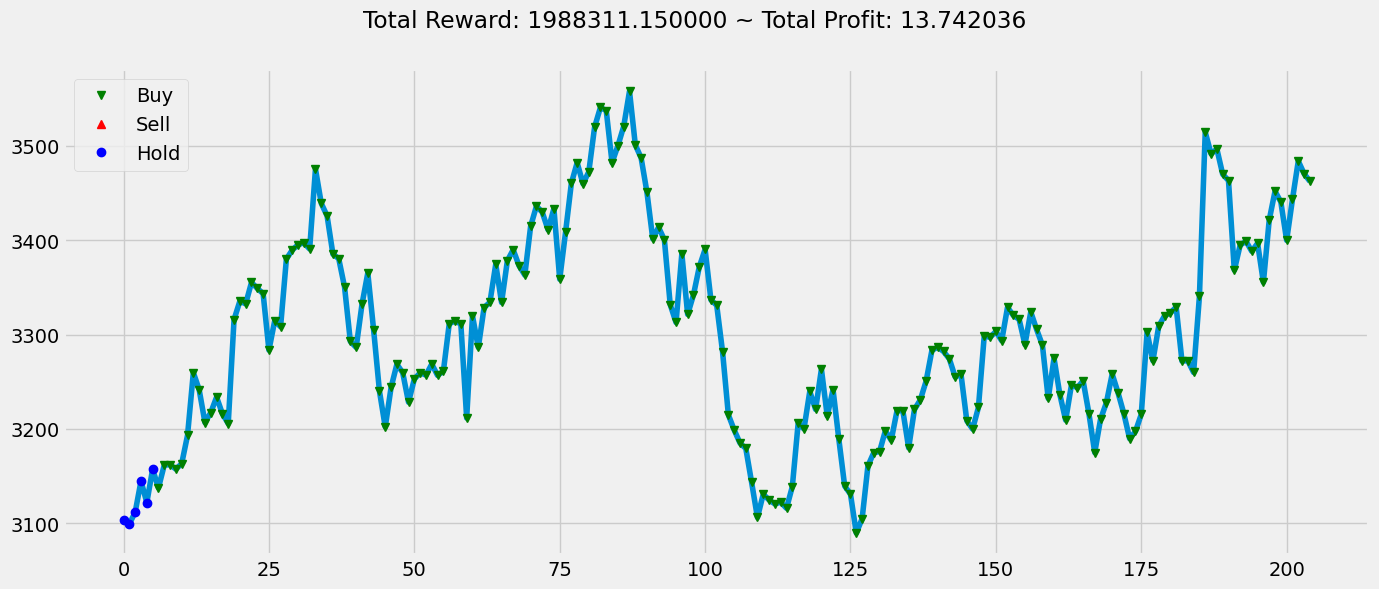

In [11]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [12]:
env_maker = lambda: gym.make('customstocks',df=df, frame_bound=(20,len(df["Date"])-100), window_size=5, initial_money=100000)
env = DummyVecEnv([env_maker])

In [13]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=50000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:196: UserWarning: WARN: The result retu

---------------------------------
| explained_variance | 0.000179 |
| fps                | 19       |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 1.75e+04 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 446      |
| nupdates           | 100      |
| policy_entropy     | 1.1      |
| total_timesteps    | 500      |
| value_loss         | 1.06e+11 |
---------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 486       |
| nupdates           | 200       |
| policy_entropy     | 1.1       |
| total_timesteps    | 1000      |
| value_loss         | 4.92e+11  |
----------------------------------
----------------------------------
| explained_variance | -1.67e-06 |
| fps                | 503       |
| nupdates           | 300       |
| policy_entropy     | 1.09      |
|

In [15]:
env = gym.make('customstocks', df=df, frame_bound=(len(df["Date"]) - 400, len(df["Date"])), window_size=5, initial_money=100000)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

e:\Projects\Python\Stock-Prediction-ML\venv37\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 3)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "


info {'total_reward': -62847698.04999998, 'total_profit': 1.0, 'position': 2}


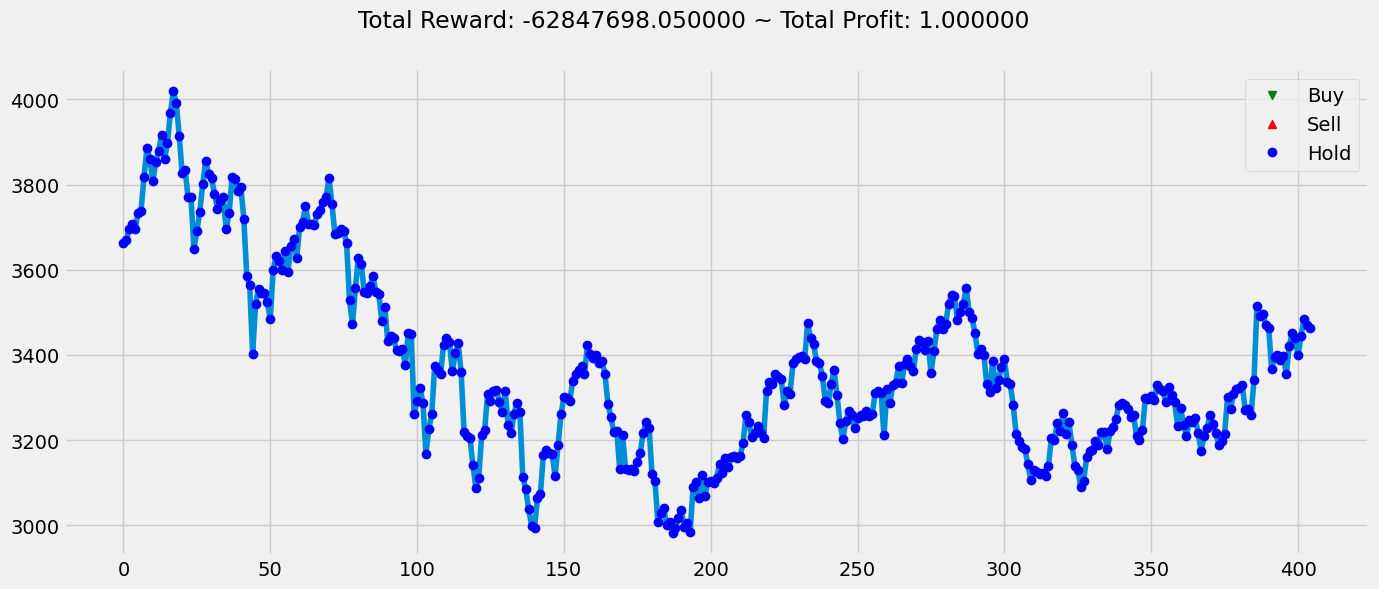

In [16]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()